<a href="https://colab.research.google.com/github/rohitjha-git/rohitjha-git-Plant-Diseases-detection/blob/test/Plant_Diseases_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import zipfile
import os

zip_file_path = "/content/drive/MyDrive/archive.zip"
extract_dir = "/content"


# Check if the zip file exists
if os.path.exists(zip_file_path):
    try:
        # Create a ZipFile object
        with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
            # Extract all contents to the specified directory
            zip_ref.extractall(extract_dir)
        print(f"Successfully extracted '{zip_file_path}' to '{extract_dir}'")
    except zipfile.BadZipFile:
        print(f"Error: '{zip_file_path}' is not a valid zip file.")
    except Exception as e:
        print(f"An error occurred: {e}")
else:
    print(f"Error: '{zip_file_path}' does not exist.")

Successfully extracted '/content/drive/MyDrive/archive.zip' to '/content'


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pathlib
import os
import glob as gb
import glob
import cv2
import tensorflow as tf

In [7]:
train='/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train'

In [8]:
size=224
train_generator=tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=90,
    width_shift_range=0.0,
    height_shift_range=0.0,
    shear_range=0.0,
    zoom_range=0.0,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=1/255.0,
    preprocessing_function=None,
    validation_split=0.1,
).flow_from_directory(train,
                      batch_size=164,
                      target_size=(size,size),
                      subset="training",
                      color_mode='rgb', #"rgb", "rgba", or "grayscale"
                      class_mode='categorical',  # Use 'binary', 'sparse','categorical' or None as needed
                      shuffle=True)

Found 63282 images belonging to 38 classes.


In [9]:
train_generator.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

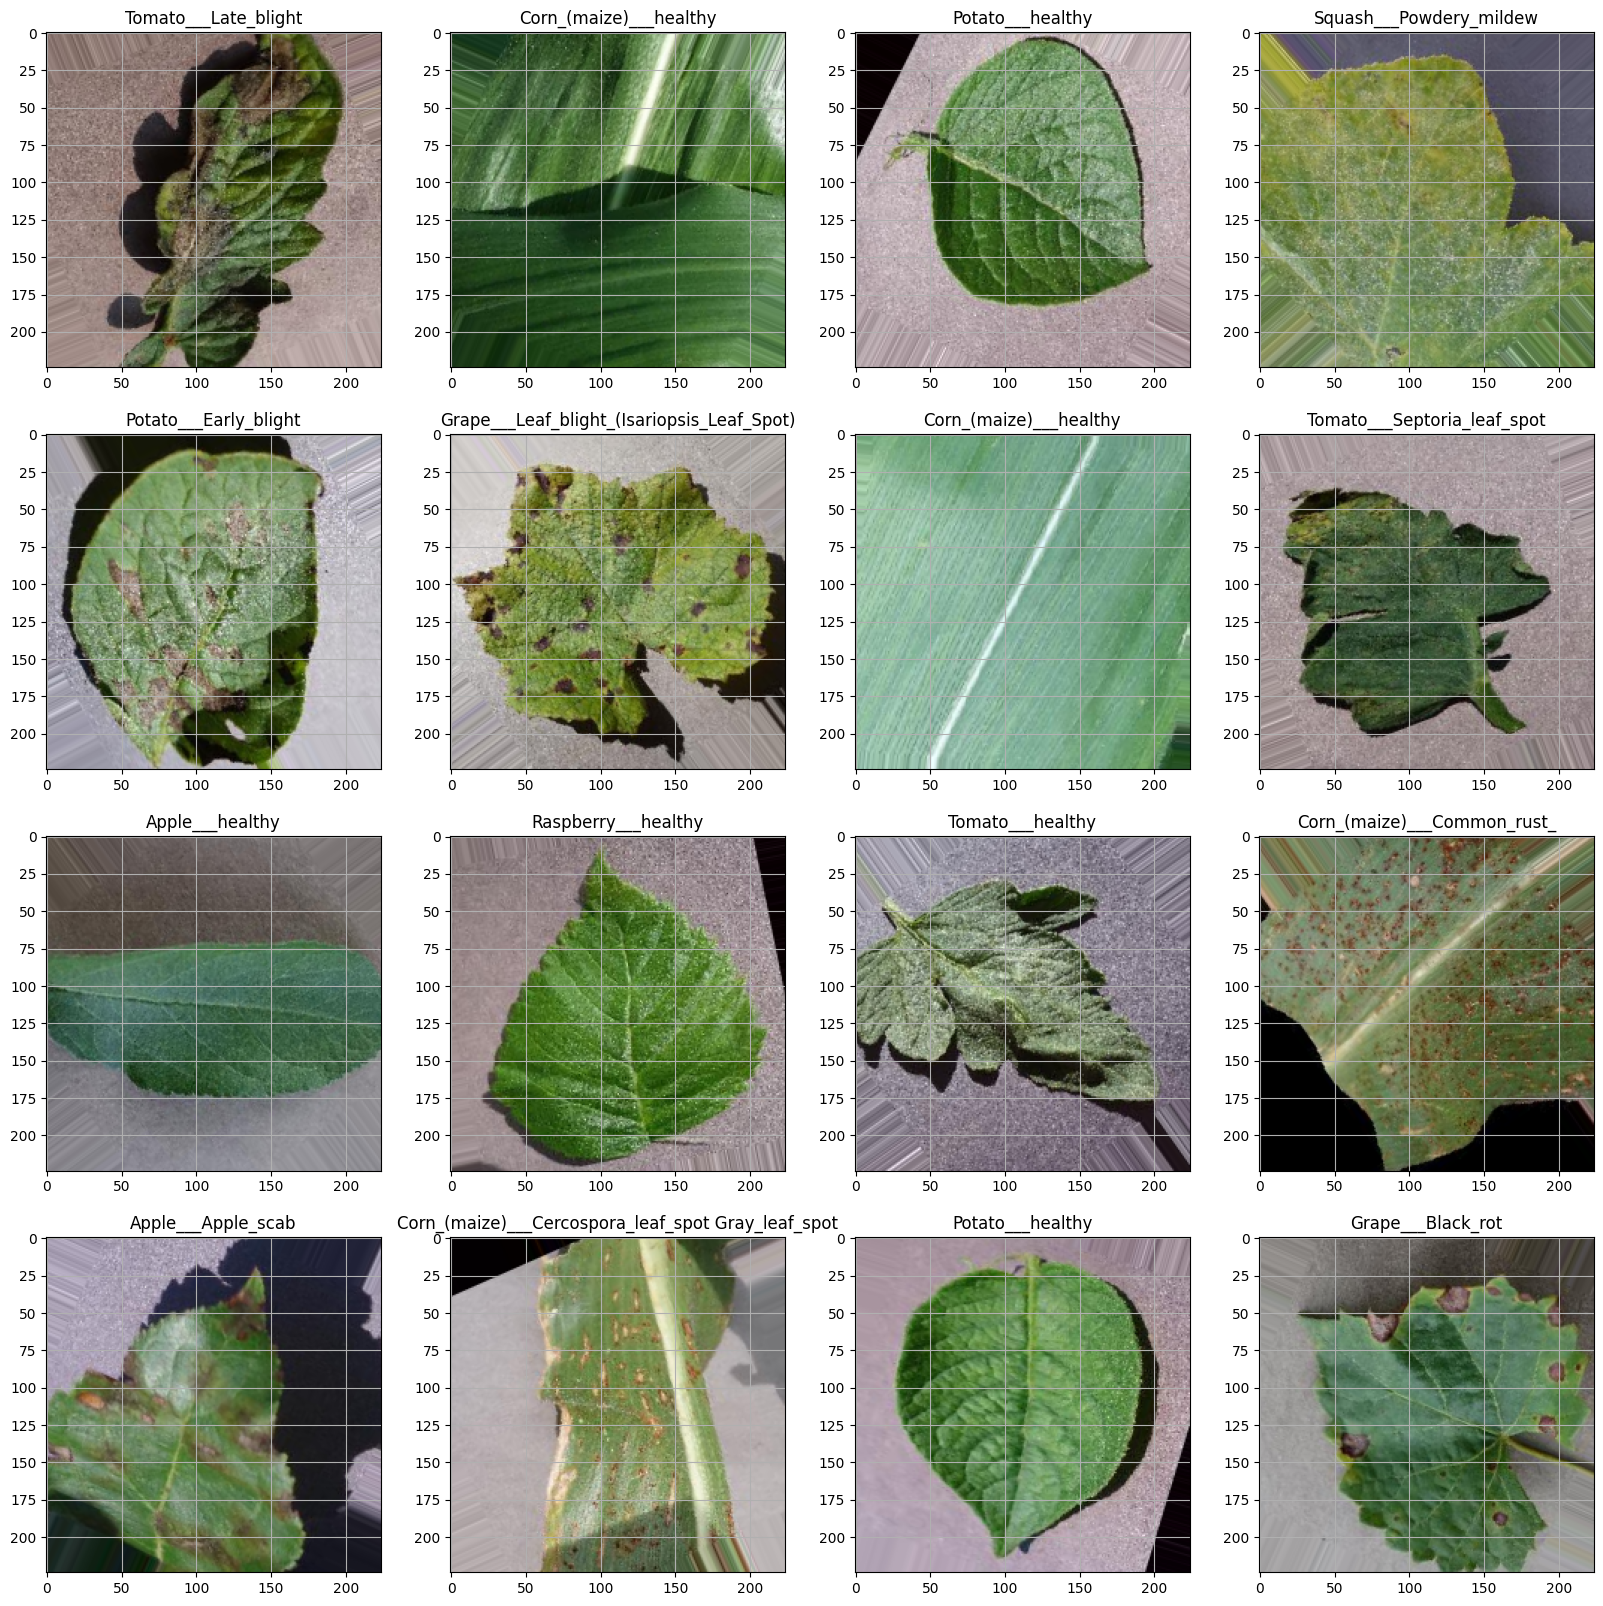

In [10]:
#let's display some images from training set

classes=list(train_generator.class_indices.keys())
plt.figure(figsize=(20,20))
for X_batch, y_batch in train_generator:
    # create a grid of 3x3 images
    for i in range(0,16):
        plt.subplot(4,4,i+1)
        plt.imshow(X_batch[i])
        plt.title(classes[np.where(y_batch[i]==1)[0][0]])   # when y is categorical
        # plt.title(classes[int(y_batch[i])])   # when y is binary or sparse
        plt.grid(None)
    # show the plot
    plt.show()
    break


In [11]:
valid='/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid'

In [12]:
valid_generator=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.0,
    preprocessing_function=None,
    validation_split=0.1,
).flow_from_directory(valid,
                      batch_size=164,
                      target_size=(224,224),
                      subset='validation',
                      color_mode='rgb', #"rgb", "rgba", or "grayscale"
                      class_mode='categorical',  # Use 'binary', 'sparse','categorical' or None as needed
                      shuffle=False)

Found 1742 images belonging to 38 classes.


In [13]:
test='/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid'
test_generator=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.0,
    preprocessing_function=None,
).flow_from_directory(test,
                      batch_size=164,
                      target_size=(224,224),
                      color_mode='rgb', #"rgb", "rgba", or "grayscale"
                      class_mode='categorical',  # Use 'binary', 'sparse','categorical' or None as needed
                      shuffle=False)

Found 17572 images belonging to 38 classes.


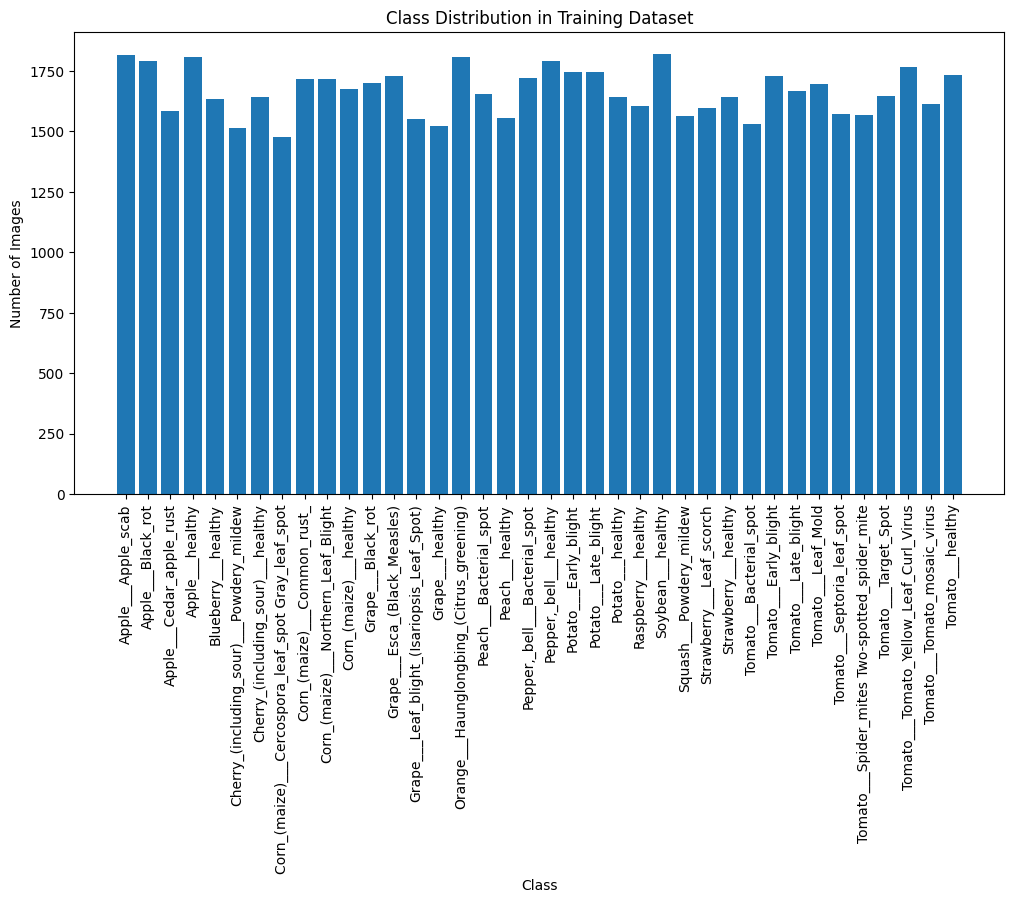

In [14]:
# Count the number of images per class in the training set
class_counts = train_generator.classes
class_labels = list(train_generator.class_indices.keys())

# Count occurrences of each class
class_distribution = pd.Series(class_counts).value_counts().sort_index()

# Display class distribution
plt.figure(figsize=(12,6))
plt.bar(class_distribution.index, class_distribution.values, tick_label=class_labels)
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Class Distribution in Training Dataset')
plt.xticks(rotation=90)
plt.show()

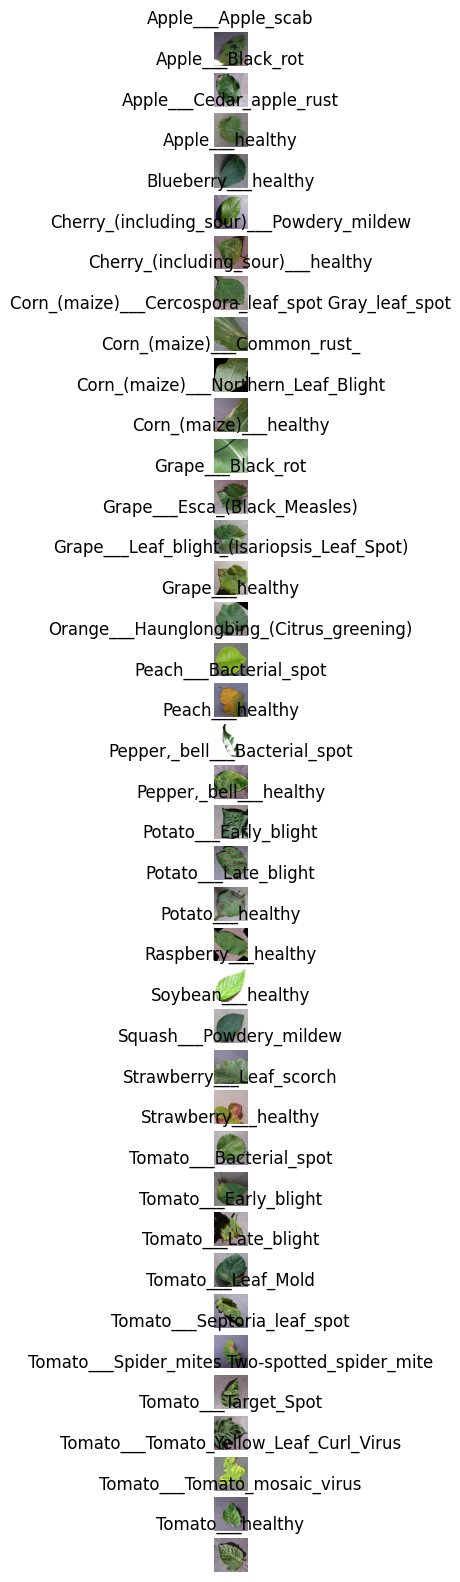

In [18]:
# Plot some example images from each class in the dataset

classes = list(train_generator.class_indices.keys())

plt.figure(figsize=(20, 20))
for i, class_name in enumerate(classes):
    for X_batch, y_batch in train_generator:
        class_idx = train_generator.class_indices[class_name]
        # Get the first image from the batch that belongs to this class
        idx = np.where(y_batch[:, class_idx] == 1)[0][0]
        img = X_batch[idx]
        # Plot the image
        plt.subplot(len(classes), 5, i * 5 + 1)
        plt.imshow(img)
        plt.title(class_name)
        plt.axis('off')
        break

plt.show()

In [17]:
# Check the shape of images in the training dataset
image_shapes = []
for X_batch, y_batch in train_generator:
    image_shapes.append(X_batch.shape[1:])  # Shape of images (height, width, channels)
    break  # Exit after the first batch

# Show the shape of images in the dataset
print(f"Image shape: {image_shapes[0]}")

Image shape: (224, 224, 3)


In [ ]:
# Check the number of channels in the images
sample_image = X_batch[0]  # Take the first image in the batch
channels = sample_image.shape[2]
print(f"Number of color channels in images: {channels}")

In [ ]:
class_counts = pd.Series(train_generator.classes).value_counts()

# Map class indices back to their names
class_labels = {v: k for k, v in train_generator.class_indices.items()}
class_counts.index = class_counts.index.map(class_labels)

# Plot the distribution
plt.figure(figsize=(10, 6))
class_counts.sort_index().plot(kind='bar', color='skyblue')
plt.xticks(rotation=90)
plt.title("Class Distribution in Training Dataset")
plt.xlabel("Disease Type")
plt.ylabel("Number of Images")
plt.show()

In [ ]:
val_classes = valid_generator.classes
val_distribution = pd.Series(val_classes).value_counts().sort_index()
plt.bar(val_distribution.index, val_distribution.values, tick_label=class_labels)
plt.title("Class Distribution in Validation Dataset")
plt.show()

In [ ]:
img = X_batch[0]  # Example image from training set
plt.hist(img.ravel(), bins=256, color='orange', alpha=0.7)
plt.title("Pixel Intensity Distribution")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()

In [ ]:
for X_batch, y_batch in train_generator:
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(X_batch[i])
        plt.axis('off')
    plt.suptitle("Augmented Images")
    plt.show()
    break

In [ ]:
plt.figure(figsize=(20, 20))
for i, class_name in enumerate(classes[:5]):  # Display samples for first 5 classes
    for X_batch, y_batch in train_generator:
        class_idx = train_generator.class_indices[class_name]
        idx = np.where(y_batch[:, class_idx] == 1)[0][0]
        img = X_batch[idx]
        plt.subplot(5, 5, i + 1)
        plt.imshow(img)
        plt.title(class_name)
        plt.axis('off')
        break
plt.show()

In [ ]:
!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# Create a sample DataFrame

num_rows = 100  # Number of rows in the DataFrame
num_cols = 5   # Number of columns in the DataFrame
data = np.random.rand(num_rows, num_cols)  # Generate random data
df = pd.DataFrame(data, columns=[f'col_{i}' for i in range(num_cols)])  # Create DataFrame

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.0,
    rotation_range=90,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.1  # Reserve 10% of training data for validation
).flow_from_directory(
    train,
    target_size=(224, 224),
    batch_size=32,
    subset="training",
    class_mode="categorical"
)

valid_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.0,
    validation_split=0.1
).flow_from_directory(
    train,
    target_size=(224, 224),
    batch_size=32,
    subset="validation",
    class_mode="categorical"
)

In [ ]:
test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.0
).flow_from_directory(
    test,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    shuffle=False  # Keep the order consistent for evaluation
)

In [ ]:
print(f"Training samples: {len(train_generator.classes)}")
print(f"Validation samples: {len(valid_generator.classes)}")
print(f"Test samples: {len(test_generator.classes)}")

In [ ]:
from sklearn.model_selection import train_test_split
import os
from shutil import copy
from pathlib import Path

# Define the paths
path_to_all_images = "/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train"
train_directory_path = "/content/new plant diseases dataset(augmented)/Split/train"
test_directory_path = "/content/new plant diseases dataset(augmented)/Split/test"
valid_directory_path = "/content/new plant diseases dataset(augmented)/Split/valid"

# Ensure output directories exist
Path(train_directory_path).mkdir(parents=True, exist_ok=True)
Path(test_directory_path).mkdir(parents=True, exist_ok=True)
Path(valid_directory_path).mkdir(parents=True, exist_ok=True)

# Get all image file paths and labels
all_images = []
labels = []

for class_folder in os.listdir(path_to_all_images):
    class_path = os.path.join(path_to_all_images, class_folder)
    if os.path.isdir(class_path):  # Ensure it's a folder
        for image_file in os.listdir(class_path):
            all_images.append(os.path.join(class_path, image_file))
            labels.append(class_folder)

# Split the dataset
train_images, test_images, train_labels, test_labels = train_test_split(
    all_images, labels, test_size=0.2, stratify=labels, random_state=42
)

train_images, valid_images, train_labels, valid_labels = train_test_split(
    train_images, train_labels, test_size=0.1, stratify=train_labels, random_state=42
)

# Function to copy files to the respective directories
def copy_files(images, labels, destination_path):
    for img_path, label in zip(images, labels):
        label_dir = os.path.join(destination_path, label)
        Path(label_dir).mkdir(parents=True, exist_ok=True)
        copy(img_path, label_dir)

# Copy images to train, test, and valid directories
copy_files(train_images, train_labels, train_directory_path)
copy_files(test_images, test_labels, test_directory_path)
copy_files(valid_images, valid_labels, valid_directory_path)

print("Data successfully split and copied!")

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:
# Load the pretrained ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
base_model.trainable = False

# Add custom classification head
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')  # Output layer
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks for early stopping and learning rate adjustment
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-5)

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=1,  # Adjust epochs as needed
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

In [ ]:

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

In [ ]:
# Plot training and validation metrics
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error

# Predict on the test set
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Accuracy, Precision, Recall, F1 Score
accuracy = accuracy_score(y_true, y_pred_classes)
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# RMSE (Root Mean Squared Error) for regression models
rmse = np.sqrt(mean_squared_error(y_true, y_pred_classes))
print(f"RMSE: {rmse:.2f}")

In [ ]:
from kerastuner.tuners import Hyperband
from tensorflow.keras.optimizers import Adam

# Define a function to build and compile your model
def build_model(hp):
    base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    base_model.trainable = False
    inputs = tf.keras.Input(shape=(224, 224, 3))
    x = base_model(inputs, training=False)
    x = GlobalAveragePooling2D()(x)

    # Hyperparameters for Dropout and Dense layer size
    x = Dropout(hp.Float('dropout', 0.2, 0.5, step=0.1))(x)
    x = Dense(hp.Int('units', min_value=128, max_value=512, step=128), activation='relu')(x)
    outputs = Dense(len(train_generator.class_indices), activation='softmax')(x)

    model = Model(inputs, outputs)

    # Hyperparameters for optimizer
    model.compile(optimizer=Adam(learning_rate=hp.Float('learning_rate', 1e-5, 1e-2, sampling='log')),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Use Keras Tuner to search for optimal hyperparameters
tuner = Hyperband(build_model,
                  objective='val_accuracy',
                  max_epochs=1,
                  factor=3,
                  directory='my_dir',
                  project_name='Hyperparameter_Tuning')

# Perform the search
tuner.search(train_generator, epochs=10, validation_data=valid_generator)

In [ ]:
# Visualize training and validation loss/accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize base model (e.g., Decision Tree)
base_model = DecisionTreeClassifier()

# Apply Bagging
bagging_model = BaggingClassifier(base_model, n_estimators=50, random_state=42)
bagging_model.fit(train_features, train_labels)

# Predict with Bagging
y_pred_bagging = bagging_model.predict(test_features)

# Evaluate performance
accuracy_bagging = accuracy_score(test_labels, y_pred_bagging)
print(f"Bagging Accuracy: {accuracy_bagging:.2f}")

In [ ]:
import xgboost as xgb

# Initialize XGBoost model
xgb_model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.01, max_depth=6)

# Train the model
xgb_model.fit(train_features, train_labels)

# Predict and evaluate
y_pred_xgb = xgb_model.predict(test_features)
accuracy_xgb = accuracy_score(test_labels, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb:.2f}")

In [ ]:
import shap

# Initialize SHAP explainer
explainer = shap.KernelExplainer(model.predict, train_features)

# Calculate SHAP values
shap_values = explainer.shap_values(test_features)

# Plot SHAP summary plot
shap.summary_plot(shap_values, test_features)

In [ ]:
# Evaluate final model on test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Final Test Accuracy: {test_accuracy * 100:.2f}%")